In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=12, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + gard * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:

    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    
    model.compile(loss='mean_squared_error', optimizer = optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, 
                        y_train, 
                        validation_data = (x_valid_scaled, y_valid), 
                        epochs=100, 
                        callbacks=callbacks)
    histories.append(history)
model.summary()


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 4.3489 - val_loss: 3.7690
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 3.0908 - val_loss: 2.7997
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 2.3244 - val_loss: 2.1944
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 1.8425 - val_loss: 1.8038
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 1.5263 - val_loss: 1.5370
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3117 - val_loss: 1.3514
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 1.1626 - val_loss: 1.2180
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0562 - val_loss: 1.1195
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9784 - val_loss: 1.0456
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9206 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.5404 - val_loss: 0.5828
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5386 - val_loss: 0.5808
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5367 - val_loss: 0.5788
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5349 - val_loss: 0.5768
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5332 - val_loss: 0.5748
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 0.5728
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5297 - val_loss: 0.5709
Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.8135 - val_loss: 1.8986
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3754 - val_loss: 1.1566
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9530 - val_loss: 0.9

363/363 [==============================] - 0s 1ms/step - loss: 0.4642 - val_loss: 0.4868
Epoch 19/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4605 - val_loss: 0.4837
Epoch 20/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4575 - val_loss: 0.4801
Epoch 21/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4547 - val_loss: 0.4765
Epoch 22/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4519 - val_loss: 0.4736
Epoch 23/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4494 - val_loss: 0.4710
Epoch 24/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4469 - val_loss: 0.4682
Epoch 25/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4447 - val_loss: 0.4659
Epoch 26/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 0.4638
Epoch 27/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4408 - val_loss: 

Learning_rate:  0.0001


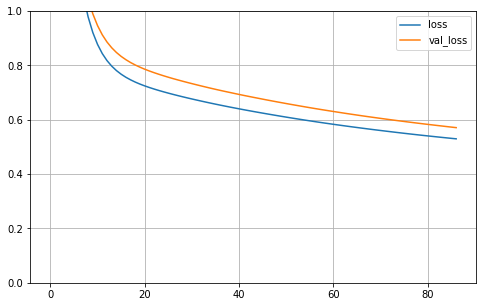

Learning_rate:  0.0003


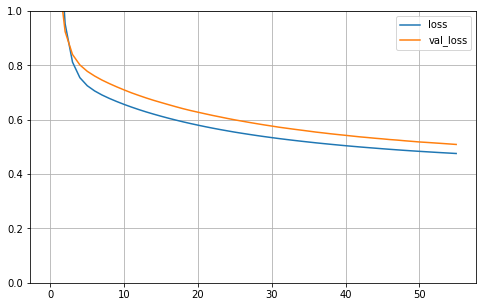

Learning_rate:  0.001


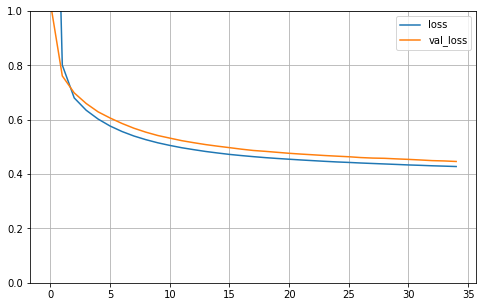

Learning_rate:  0.003


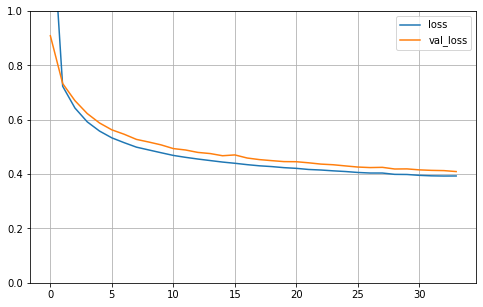

Learning_rate:  0.01


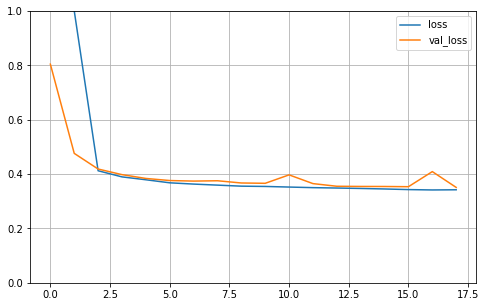

Learning_rate:  0.03


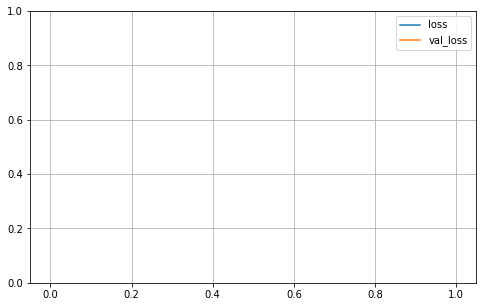

In [9]:
def plot_learning_curvres(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr, history in zip(learning_rates, histories):
    print("Learning_rate: ", lr)
    plot_learning_curvres(history)

In [7]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 746us/step - loss: nan


nan